# 1. Setup

In [2]:
!pip install git+https://github.com/usgs/geomag-algorithms.git
!pip install git+https://github.com/samiriff/mars-ode-data-access.git

  Cloning https://github.com/usgs/geomag-algorithms.git to /tmp/pip-req-build-ypt4i0vm
  Running command git clone -q https://github.com/usgs/geomag-algorithms.git /tmp/pip-req-build-ypt4i0vm
     |████████████████████████████████| 23.9MB 1.6MB/s 
     |████████████████████████████████| 215kB 37.8MB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-48fgo0gn/wheels/dc/8b/cb/0141ac2aa76db65e2037c96bf61b63c26a64a1eb4ddb6f7eeb
  Stored in directory: /root/.cache/pip/wheels/11/d6/40/c448464ae42229b2f9fb46b71be0213e10e9628346b7f1198f
  Stored in directory: /root/.cache/pip/wheels/89/40/f5/7b4f2285aca871b5173887a6c69127210d92806c0d3a977e51
Successfully built geomag-algorithms obspy pycurl
  Cloning https://github.com/samiriff/mars-ode-data-access.git to /tmp/pip-req-build-3e_qnrpa
  Running command git clone -q https://github.com/samiriff/mars-ode-data-access.git /tmp/pip-req-build-3e_qnrpa
     |████████████████████████████████| 19.7MB 5.1MB/s 
     |████████████████████████████████| 20.1

In [0]:
from ode_data_access.query_processor import QueryProcessor
from ode_data_access.query_result_processor import QueryResultProcessor
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# 2. Initialize Vectorized Chunks List
- Run the following cell only once, to initialize a list to keep track of all the chunks prepared from multiple queries

In [0]:
vectorized_chunks = []   # Change to None if you only require the folder of images and not an NPZ file

# 3. Query Processing
- Run the following cells multiple times with different query parameters
- Each run will take care of aggregating chunks in the vectorized_chunks list
- Once you have got all the results you require, save the vectorized_chunks list as an NPZ file by going to step 4

In [0]:
# Query Parameters
target = 'mars'  # Aimed planetary body, i.e., Mars, Mercury, Moon, Phobos, or Venus
mission = 'MRO'  # Aimed mission, e.g., MGS or MRO
instrument = 'HIRISE'  # Aimed instrument from the mission, e.g., HIRISE or CRISM
product_type = 'RDRV11'  # Type of product to look for, e.g., DTM or RDRV11
western_lon = 234.24  # Western longitude to look for the data, from 0 to 360
eastern_lon = 234.25  # Eastern longitude to look for the data, from 0 to 360
min_lat = 68.21  # Minimal latitude to look for the data, from -90 to 90
max_lat = 68.22  # Maximal latitude to look for the data, from -90 to 90
product_id = '*160*RED*'  # PDS Product Id to look for, with wildcards (*) allowed
min_ob_time = ''  # Minimal observation time in (even partial) UTC format, e.g., '2017-03-01'
max_ob_time = ''  # Maximal observation time in (even partial) UTC format, e.g., '2017-03-01'
file_name = '*.(JP2|LBL)'  # File name to look for, with wildcards (*) allowed
number_product_limit = 10  # Maximal number of products to return (100 at most)
result_offset_number = 0  # Offset the return products, to go beyond the limit of 100 returned products
remove_ndv = True  # Replace the no-data value as mentionned in the label by np.nan
bin_type = 1 # Type of binning used in image - Bin1 = 0.35 cm/pixel, Bin2 = 2xBin1, Bin4 = 2xBin2

# Chunk Settings
SAVE_DIR_PREFIX = './chunks'
CHUNK_SIZE = 1024
SKIP_BLACK_IMAGES = True  # Set to False to retain all images that contain black pixels

# Default Settings to Align and Crop images with black margins
MAX_BORDER_SIZE = 200   # Border to be checked around the image
SAFETY_MARGIN = 0       # Removes extra pixels from the sides to make sure no black remains
TOLERANCE = 10          # A gray value is more likely to be considered black when you increase the tolerance
ALIGN_AND_CROP_THRESHOLDS = (MAX_BORDER_SIZE, SAFETY_MARGIN, TOLERANCE) # Set to None to prevent alignment and cropping

# Query Result Processing
query_processor = QueryProcessor()
query_results = query_processor.query_files_urls(target, mission, instrument, product_type,
                                                 western_lon, eastern_lon, min_lat, max_lat,
                                                 min_ob_time, max_ob_time, product_id, file_name,
                                                 number_product_limit, result_offset_number)
print("Total Number of Files of all bin types =", len(query_results.keys()))
query_result_processor = QueryResultProcessor()
should_continue = query_result_processor.download(query_results, bin_type)
if should_continue:
  query_result_processor.process(SAVE_DIR_PREFIX, CHUNK_SIZE, SKIP_BLACK_IMAGES, ALIGN_AND_CROP_THRESHOLDS, vectorized_chunks)

Query URL: http://oderest.rsl.wustl.edu/live2/?target=mars&ihid=MRO&iid=HIRISE&pt=RDRV11&westernlon=234.24&easternlon=234.25&minlat=68.21&maxlat=68.22&query=product&results=fp&output=XML&limit=10&offset=0&productid=*160*RED*
Total Number of Files of all bin types = 2
Required Product Names matching the given bin type = {'ESP_016160_2485_RED'}
Total number of images to be downloaded = 1

Do you wish to proceed? [Y/n] y
...100%, 355 MB, 2107 KB/s, 172 seconds passed
----
Beginning Chunking Process
Chunkifying ESP_016160_2485_RED
Resolution = 39765 x 26373
Estimated number of iterations = 1085.1514285326004


1014it [05:30,  8.40it/s]

Number of chunks found: 390
-----
Completed Chunking Process


In [11]:
# Query Parameters
target = 'mars'  # Aimed planetary body, i.e., Mars, Mercury, Moon, Phobos, or Venus
mission = 'MRO'  # Aimed mission, e.g., MGS or MRO
instrument = 'HIRISE'  # Aimed instrument from the mission, e.g., HIRISE or CRISM
product_type = 'RDRV11'  # Type of product to look for, e.g., DTM or RDRV11
western_lon = 0  # Western longitude to look for the data, from 0 to 360
eastern_lon = 360  # Eastern longitude to look for the data, from 0 to 360
min_lat = -90  # Minimal latitude to look for the data, from -90 to 90
max_lat = 90  # Maximal latitude to look for the data, from -90 to 90
product_id = '*COLOR*'  # PDS Product Id to look for, with wildcards (*) allowed
min_ob_time = ''  # Minimal observation time in (even partial) UTC format, e.g., '2017-03-01'
max_ob_time = ''  # Maximal observation time in (even partial) UTC format, e.g., '2017-03-01'
file_name = '*.(JP2|LBL)'  # File name to look for, with wildcards (*) allowed
number_product_limit = 10  # Maximal number of products to return (100 at most)
result_offset_number = 0  # Offset the return products, to go beyond the limit of 100 returned products
remove_ndv = True  # Replace the no-data value as mentionned in the label by np.nan
bin_type = 1 # Type of binning used in image - Bin1 = 0.35 cm/pixel, Bin2 = 2xBin1, Bin4 = 2xBin2

# Chunk Settings
SAVE_DIR_PREFIX = './chunks'
CHUNK_SIZE = 1024
SKIP_BLACK_IMAGES = True  # Set to False to retain all images that contain black pixels

# Default Settings to Align and Crop images with black margins
MAX_BORDER_SIZE = 200   # Border to be checked around the image
SAFETY_MARGIN = 0       # Removes extra pixels from the sides to make sure no black remains
TOLERANCE = 10          # A gray value is more likely to be considered black when you increase the tolerance
ALIGN_AND_CROP_THRESHOLDS = (MAX_BORDER_SIZE, SAFETY_MARGIN, TOLERANCE) # Set to None to prevent alignment and cropping

# Query Result Processing
query_processor = QueryProcessor()
query_results = query_processor.query_files_urls(target, mission, instrument, product_type,
                                                 western_lon, eastern_lon, min_lat, max_lat,
                                                 min_ob_time, max_ob_time, product_id, file_name,
                                                 number_product_limit, result_offset_number)
print("Total Number of Files of all bin types =", len(query_results.keys()))
query_result_processor = QueryResultProcessor()
should_continue = query_result_processor.download(query_results, bin_type)
if should_continue:
  query_result_processor.process(SAVE_DIR_PREFIX, CHUNK_SIZE, SKIP_BLACK_IMAGES, ALIGN_AND_CROP_THRESHOLDS, vectorized_chunks)

Query URL: http://oderest.rsl.wustl.edu/live2/?target=mars&ihid=MRO&iid=HIRISE&pt=RDRV11&westernlon=0&easternlon=360&minlat=-90&maxlat=90&query=product&results=fp&output=XML&limit=10&offset=0&productid=*COLOR*
Total Number of Files of all bin types = 20
Required Product Names matching the given bin type = {'ESP_012602_1415_COLOR', 'ESP_012603_1300_COLOR', 'ESP_012607_0980_COLOR', 'ESP_012601_0930_COLOR', 'ESP_012602_2265_COLOR', 'ESP_012604_1450_COLOR', 'ESP_012604_0965_COLOR', 'ESP_012600_2080_COLOR', 'ESP_012601_1400_COLOR', 'ESP_012605_1685_COLOR'}
Total number of images to be downloaded = 10

Do you wish to proceed? [Y/n] n
Terminating Process...


# 4. Downloading Chunks from Colaboratory

## 4.1 Add all chunks to downloadable archive

In [0]:
!zip -q ./chunks.zip -r {SAVE_DIR_PREFIX}*

In [0]:
files.download('./chunks.zip')

## 4.2 Save All Chunks in NPZ Format

### 4.2.1 Save the vectorized_chunks list in npz format

In [0]:
np.array(vectorized_chunks).shape

(687, 1024, 1024)

In [0]:
len(vectorized_chunks)

687

In [0]:
np.savez_compressed('./all_chunks.npz', np.array(vectorized_chunks))

### 4.2.2 Test NPZ File

In [0]:
data = np.load('./all_chunks.npz', allow_pickle=True)
data[data.files[0]].shape

(687, 1024, 1024)

(1024, 1024)


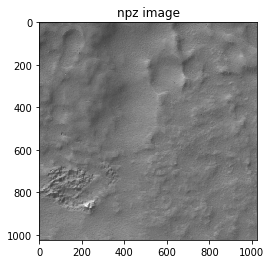

In [0]:
img=data[data.files[0]][2]
print(img.shape)
plt.title('npz image')
plt.imshow(img, cmap='gray')

### 4.2.3 Download NPZ File

In [0]:
files.download('./all_chunks.npz')

# Testing

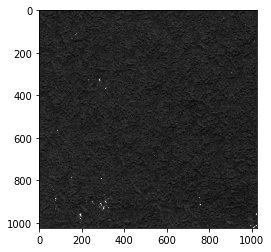

In [0]:
plt.imshow(mpimg.imread('./chunks_ESP_016793_2485_RED/ESP_016793_2485_RED_img_row_6144_col_17408_w_1024_h_1024_x_0_y_0.jpg'), cmap='gray')

# Extras

## Converting Landing Site Coordinates to Planetocentric Coordinates that can be understood by ODE

In [0]:
import pandas as pd
import re

In [0]:
def convert_latitude(latitude):
  value, direction = latitude.split(' ')
  return value if direction == 'N' else -float(value)

In [0]:
def convert_longitude(longitude):
  value, direction = longitude.strip().split(' ')
  value = float(value)
  if direction == 'W':
    value = 360 - value
  return value

In [0]:
with open('../Landing_sites.csv', 'r') as f:
  lines = f.readlines()
  formatted_lines = []
  regex = re.compile(".*?\((.*?)\)")
  for line in lines:
    formatted_line = line.strip()
    formatted_line = re.sub("[\(\[].*?[\)\]]", "", formatted_line)
    formatted_lines.append(formatted_line.split(', '))
    
landing_sites = pd.DataFrame(formatted_lines, columns=['Mission', 'Latitude', 'Longitude', 'Status'])
landing_sites['Latitude'] = landing_sites['Latitude'].apply(convert_latitude)
landing_sites['Longitude'] = landing_sites['Longitude'].apply(convert_longitude)
landing_sites

,Mission,Latitude,Longitude,Status
0,Mars 2,-45,47.000000,Failed
1,Mars 3,-45,202.000000,Failed
2,Mars 6,-23.9,340.580000,Failed
3,Viking 1,22.48,310.030000,Successful
4,Mars Polar Lander,-76.57,165.200000,Failed
5,Pathfinder,19.33,326.450000,Successful
6,Beagle 2,10.6,90.000000,Failed
7,Spirit,-14.5719,175.478480,Successful
8,Opportunity,-1.9462,354.473400,Successful
9,Phoenix,68.218830,234.250778,Successful


In [0]:
landing_sites.to_csv('./landing_sites_ode_coordinates.csv')